<a href="https://colab.research.google.com/github/danpanetta/data_science/blob/master/Analyzing_Airbnb_Data_Dublin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing Airbnb Data - Dublin

Airbnb, Inc. is an **online marketplace company** that connects people who want to rent their homes or rooms with those looking for accommodation in that location. The original name was AirBedandBreakfast.com and the current name Airbnb came from the shortened version of the first.

Founded in 2008, the startup had 200 million active listings in 100,000 cities in more than 220 countries and regions and had already **accommodated** more than **800 million people** by September 30, 2020.

In this project we will do some analysis with the city of Dublin, how to find out what is the size of the dataset `listings.csv`, how many rows and columns, what are the types of variables, if there is any missing value, if there are outliers and also some characteristics of the offer of listings in City.
Finally, a word cloud will be created to identify which are the most used words in the ads by the hosts.

All of these procedures will be performed using the Python language and some of its packages.

<center><img alt="Analisando Airbnb" width="50%" src="https://raw.githubusercontent.com/danpanetta/data_science/master/projetos/notebooks/Analyzing_Airbnb_Data/data/1405623476-airbnb-logo-explanation.jpg"></center>


## Data collection

All data was collected from the website [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

For this initial exploratory analysis, only the following file will be loaded:

* `listings.csv` - *Summary information and metrics for listings in Dublin (good for visualisations) (27-01-2020).*

In [1]:
# importing all the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# load csv file and parse date column 'last_review'
df = pd.read_csv('http://data.insideairbnb.com/ireland/leinster/dublin/2020-01-27/visualisations/listings.csv', parse_dates=['last_review'])

# check the dataframe
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14842,Portobello Gem. Entire house. Can sleep 3.,58344,Hilary,NaN,Dublin City,53.33106,-6.26916,Entire home/apt,93,2,44,2020-01-03,0.42,1,2
1,44077,cosy comfortable Irish cottage twin,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.28995,-6.25813,Private room,50,3,222,2020-01-12,2.06,3,267
2,85148,Habitación en Dublín Double room,466111,Don,NaN,South Dublin,53.30110,-6.31992,Private room,30,1,1,2019-05-11,0.11,1,86
3,85156,Cosy Comfortable Irish Cottage 1 Double Bed,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.29178,-6.25618,Private room,50,3,175,2020-01-17,1.66,3,269
4,121030,Comfy double room in central area 1,608225,Norah,NaN,Dublin City,53.33648,-6.22075,Private room,55,2,110,2019-03-19,1.05,3,142


As we can analyze above in the first 5 rows, each line has one id, a listing's name, host id and another 13 features.

**Data Dictionary**
- `id`: unique identifier assigned to the listing
- `name`: name of the listing
- `host_id`: unique id assigned to host
- `host_name`: host name
- `neighbourhood_group`: neighbourhood group
- `neighbourhood`: neighbourhood
- `latitude`: property latitude coordinates
- `longitude`: property longitude coordinates
- `room_type`: listing space type
- `price`: price in dollars per night
- `minimun_nights`: minimum nights a guest can book
- `number_of_reviews`: number of reviews given at the date
- `last_review`: last review date
- `reviews_per_months`: number of reviews per month
- `calculated_host_listings_count`: amount of listing per host
- `availability_365`: number of available days within the year

## Data Analysis

This step is needed to start exploring the data to see how the data is structured and what they can reveal to us.


### Shape and Type

In [3]:
# Number of observations and features
print('Observations (rows):\t {}'.format(df.shape[0]))
print('Features (columns):\t {}\n'.format(df.shape[1]))

# Check the type of the features
df.dtypes

Observations (rows):	 9250
Features (columns):	 16



id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                      float64
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

In this dataset there are a total of 9250 observation with 16 features forming a 9250x16 matrix.

There are three different types of features, 7 are `int64`, 4 `object`,  4 `float64` and one `datetime64` type.

### Missing Values

In [4]:
# Sort variables in descending order by percentage of missing values
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.157946
last_review                       0.157946
name                              0.000108
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

The only column with all the missing values is 'neighborhood_group' and both 'reviews_per_month' and 'last_review' are missing almost 16% of the values. All other columns have all values filled in.

This result of missing values is fine for now, because in this project I will not work with string data.

### Is there any outlier?



The first step to check if there is any outlier in the data could be plotting a histogram and visualize the distribution of each feature.

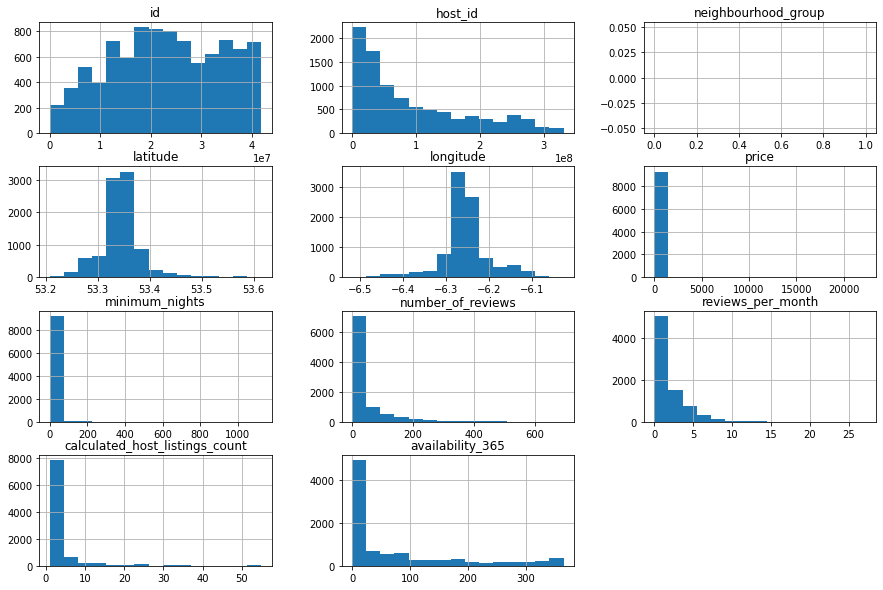

In [5]:
# Plot the histogram based on the numeric variables
df.hist(bins=15, figsize=(15, 10));

Analyzing the histograms it's possible to identify that 'price' and 'minimum_nights' features have huge outliers that modify the distribution of the histogram, showing almost only a single bar far from the maximum value.

'number_of_reviews' and 'reviews_per_month' features also have outliers but you can see other bars in the histogram.


It is also possible check the statistics of the features with the `describe` method that calculates some statistical data like percentile, mean, maximum and minimum.


In [6]:
# Check descriptive statistics from numeric variables
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month
count,9250.000000,9250.000000,9250.000000,7789.000000
mean,132.282162,4.173946,37.965081,1.784230
std,344.439298,20.797031,66.073705,2.077663
min,0.000000,1.000000,0.000000,0.010000
25%,55.000000,1.000000,2.000000,0.290000
50%,85.000000,2.000000,10.000000,1.000000
75%,147.750000,3.000000,43.000000,2.600000
max,22337.000000,1125.000000,695.000000,27.160000


This summary shows that 75% of values of 'price' are below U&#36; 147.75, but the maximum value of U&#36; 2,2337.00 is much higher. And the minimum price is out of standard because nobody is going to make the listing available for free.

In 'minimum_nights', 75% of the values are below 3 nights, but the highest value for minimum nights is 1125 nights, which is equivalent to almost 3 years. Quite questionable information.

The results for 'number_of_reviews' indicate that 75% of the values are below 43, but the maximum value is 695. This value is very high, but to consider removing this data it would be necessary to do more studies.

The maximum value for reviews_per_month seems unrealistic because almost one review a day seems not to be feasible.

The last option to check if there is an outlier that I'm going to uso will be plotting the box graph with `matplotlib`.

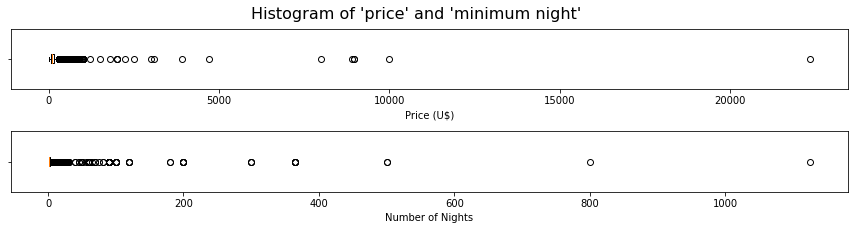

In [7]:
# Plot box graph with price data
fig, ax = plt.subplots(2, 1, figsize=(15, 3))
fig.suptitle("Histogram of 'price' and 'minimum night'", fontsize=16)
ax[0].boxplot(df.price, vert=False)
ax[0].set_yticklabels([''])
ax[0].set_xlabel('Price (U$)')

# Plot box graph with minimum nights data
ax[1].boxplot(df.minimum_nights, vert=False)
ax[1].set_yticklabels([''])
ax[1].set_xlabel('Number of Nights')

plt.subplots_adjust(hspace=0.7)


plt.show()

Both box charts showed that there are several outliers. There are so many that it is difficult to visualize the box.

In `ax.boxplot`, outliers are considered all data lower than Q1 - 1.5 * (Q3-Q1) and bigger than Q3 + 1.5 * (Q3-Q1), where Q1 and Q3 are the first and third quartiles.

To be able to look at the box it will be necessary to limit the x-axis. in the next code, the both box chart will be plotted with the limited x-axis range.

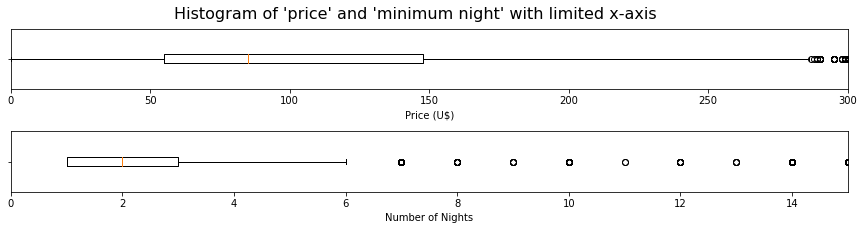

In [8]:
# Plot box graph with price data
fig, ax = plt.subplots(2, 1, figsize=(15, 3))
fig.suptitle("Histogram of 'price' and 'minimum night' with limited x-axis", fontsize=16)
ax[0].boxplot(df.price, vert=False)
ax[0].set_xlim(0, 300)
ax[0].set_yticklabels([''])
ax[0].set_xlabel('Price (U$)')

# Plot box graph with minimum nights data
ax[1].boxplot(df.minimum_nights, vert=False)
ax[1].set_xlim(0, 15)
ax[1].set_yticklabels([''])
ax[1].set_xlabel('Number of Nights')

# Adjustment of the height of the padding between subplots
plt.subplots_adjust(hspace=0.7)

plt.show()

By decreasing the range of the x-axis, we can visualize the dimensions of the box.

Thus, we were able to analyze that the highest amount charged, excluding any outliers, is around 280 and the minimum is 0. The minimum value of 0 must be considered as an incorrect value, because the services must be charged.
The first quartile has a value of approximately 60, the median is almost 80 and the third quartile is just under 150.

In the case of the number of minimum nights, the minimum value and the first quartile are 1, the third quartile is 3 and the maximum value, with the exception of outliers, is 6.

Note that the price variable has a greater variation than the minimum nights.

The next step is to calculate how many data have a price of 0 or above 300 and how many there are with more than 30 nights for minimum nights.

In [9]:
# Check the quantity of price values equal 0 and above 300 dollars
print('Price')
print('minimum and maximum value: ({}, {})'.format(df.price.min(), df.price.max()))
print('values equal to 0 or above 300: {}'.format(len(df[(df.price == 0) | (df.price > 300)])))
print('{:.2f}%'.format((len(df[df.minimum_nights > 10]) / df.shape[0]) * 100))

print('\n')
# Check the quantity of minimum_nights values above 30 nights
print('Minimum nights')
print('minimum and maximum value: ({}, {})'.format(df.minimum_nights.min(), df.minimum_nights.max()))
print('values above 30: {} entradas'.format(len(df[df.minimum_nights > 10])))
print('{:.2f}%'.format((len(df[(df.price == 0) | (df.price > 300)]) / df.shape[0]) * 100))

Price
minimum and maximum value: (0, 22337)
values equal to 0 or above 300: 539
6.28%


Minimum nights
minimum and maximum value: (1, 1125)
values above 30: 581 entradas
5.83%


Amount of selected data is not representative. In 'price', a total of 6.28% was selected and in 'minimum nights', the amount was 5.83%.

This means that 93.72% of the data in the price variable is greater than 0 or less than 300 and in the minimum nights variable, 94.17% of the data has values below 30.

Let's clean up our DataFrame to better visualize the histograms and gather information about the dataset without the influence of the outiliers.

In [10]:
# Removing outliers in a DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[(df_clean.price == 0) | (df_clean.price > 300)].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remove 'neighborhood_group' as it is empty
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

Now, check the histograms without the outliers.

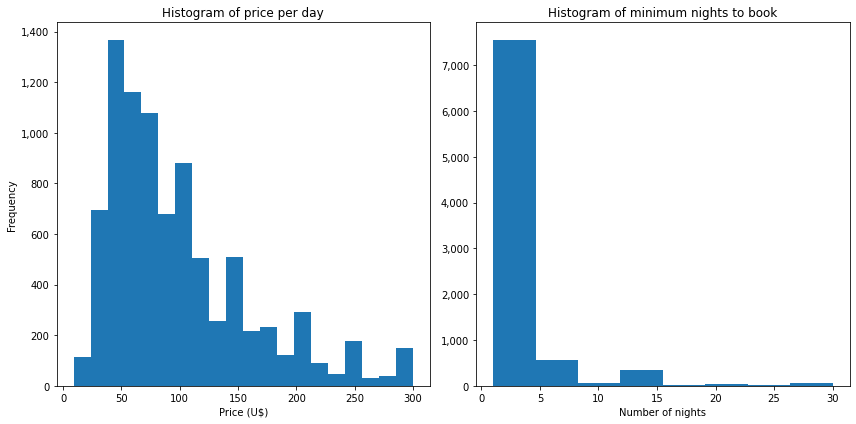

In [11]:
# plot the histogram for 'price' and 'minimum nights'
from matplotlib.ticker import FuncFormatter

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].hist(df_clean["price"], bins=20)
ax[0].set_xlabel("Price (U$)")
ax[0].set_title("Histogram of price per day")
ax[0].get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
ax[0].set_ylabel("Frequency")

ax[1].hist(df_clean["minimum_nights"], bins=8)
ax[1].set_xlabel("Number of nights")
ax[1].set_title("Histogram of minimum nights to book")
ax[1].get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))

plt.tight_layout()
plt.show()



### Listing

In this section, more information about the listings will be collected, such as the number and proportion of 'room_type', the number and the average price of the listings grouped by 'neighborhood' and plot the spatial distribution of the listings by 'longitude' and 'latitude'.

In [12]:
# show the number of listing by room type
df_clean.room_type.value_counts()

Private room       4366
Entire home/apt    4053
Shared room         147
Hotel room           79
Name: room_type, dtype: int64

In [13]:
# show the percentage of each type of listing available
df_clean.room_type.value_counts() / df_clean.shape[0]

Private room       0.505032
Entire home/apt    0.468826
Shared room        0.017004
Hotel room         0.009138
Name: room_type, dtype: float64

From the data found, the largest number of listings are registered as 'Private room' and 'Entire home/apt', the first with 50.5% of the data and the second with 46.9%.

While 'Shared room' and 'Hotel room' do not even reach 3%.

In [14]:
# see quantity of listings by neighborhood
print('Dublin City: {} listings'.format(df_clean[df_clean.neighbourhood == "Dublin City"].shape[0]))
print('Dn Laoghaire-Rathdown: {} listings'.format(df_clean[df_clean.neighbourhood == "Dn Laoghaire-Rathdown"].shape[0]))
print('Fingal: {} listings'.format(df_clean[df_clean.neighbourhood == "Fingal"].shape[0]))
print('South Dublin: {} listings'.format(df_clean[df_clean.neighbourhood == "South Dublin"].shape[0]))

Dublin City: 6534 listings
Dn Laoghaire-Rathdown: 949 listings
Fingal: 803 listings
South Dublin: 359 listings


In [15]:
# see proportion of listings by neighborhood
print('Dublin City: {:.2f}% listings'.format(100 * df_clean[df_clean.neighbourhood == "Dublin City"].shape[0] / df_clean.shape[0]))
print('Dn Laoghaire-Rathdown: {:.2f} listings'.format(100 * df_clean[df_clean.neighbourhood == "Dn Laoghaire-Rathdown"].shape[0] / df_clean.shape[0]))
print('Fingal: {:.2f} listings'.format(100 * df_clean[df_clean.neighbourhood == "Fingal"].shape[0] / df_clean.shape[0]))
print('South Dublin: {:.2f} listings'.format(100 * df_clean[df_clean.neighbourhood == "South Dublin"].shape[0] / df_clean.shape[0]))

Dublin City: 75.58% listings
Dn Laoghaire-Rathdown: 10.98 listings
Fingal: 9.29 listings
South Dublin: 4.15 listings


Dublin City is the location of the vast majority of listings in the city with 75.6% of them.

In [16]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)

neighbourhood
Dublin City              102.742730
Dn Laoghaire-Rathdown     98.972603
Fingal                    79.011208
South Dublin              71.791086
Name: price, dtype: float64

Dublin City is also the place with the highest average price.

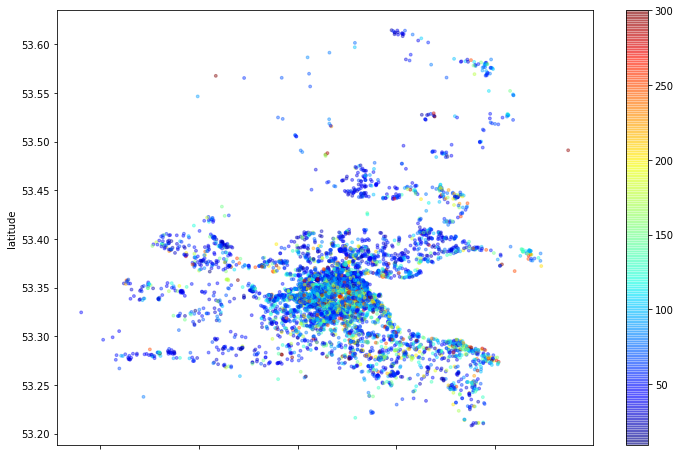

In [17]:
# plot listings by latitude-longitude
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12, 8));

In this plot, we can see that it seems to have a good distribution of prices in the city, with no location concentrating listings with only low or only high values.

## Wordcloud

The purpose of this section is to check which words are most commented in the ad of each listing.

For this, we will install the wordcloud package and import the others needed. We will load the dataset only this time the detailed version.
Let's delete the values with missing data and plot the most frequent words in an image that represents Dublin.

In [18]:
# install wordcloud
!pip install wordcloud -q

In [19]:
# import package
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [20]:
# assign the path to the variable
DATA_PATH = "http://data.insideairbnb.com/ireland/leinster/dublin/2020-01-27/data/listings.csv.gz"

# import csv to DataFrame
df_dublin = pd.read_csv(DATA_PATH)

# read first 5 rows
df_dublin.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,14842,https://www.airbnb.com/rooms/14842,20200127065510,2020-01-27,Portobello Gem. Entire house. Can sleep 3.,"Beautiful entire house, newly revamped, with s...","Gorgeous, newly revamped central Dublin city e...","Beautiful entire house, newly revamped, with s...",none,Portobello is an exceptional place to live - v...,NaN,"There is great public transport - buses, Luas,...",Guests get the whole house to themselves.,I love meeting guests and I give you extensive...,"This house is a charming space, just completel...",NaN,NaN,https://a0.muscache.com/im/pictures/106656330/...,NaN,58344,https://www.airbnb.com/users/show/58344,Hilary,2009-11-29,"Dublin, County Dublin, Ireland",An easy-going and friendly Irish woman. Works ...,within a day,100%,NaN,f,https://a0.muscache.com/im/users/58344/profile...,https://a0.muscache.com/im/users/58344/profile...,NaN,0,0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,f,"Dublin, Dublin City, Ireland",Portobello,Dublin City,...,$30.00,2,3,2,2,1125,1125,2.0,1125.0,a week ago,t,2,2,2,2,2020-01-27,44,2,2011-07-11,2020-01-03,95.0,10.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.42
1,44077,https://www.airbnb.com/rooms/44077,20200127065510,2020-01-27,cosy comfortable Irish cottage twin,Our house was built in 1937 when there was ple...,"Hi, My name is Teresa and we have 3 rooms ava...",Our house was built in 1937 when there was ple...,none,I like our neighbourhood as there is no shorta...,Dundrum was always known as a Spa Town and the...,There is a bus stop 2 mins up the road from us...,We have a beautiful landscaped garden with tab...,We live on the premises so we are always on ha...,Welcome to our cottage and we hope you will en...,NaN,NaN,https://a0.muscache.com/im/pictures/525706/050...,NaN,193005,https://www.airbnb.com/users/show/193005,Teresa,2010-08-06,Dublin Ireland,"I am a friendly outgoing Irishwoman ,who love...",within an hour,100%,NaN,t,https://a0.muscache.com/im/users/193005/profil...,https://a0.muscache.com/im/users/193005/profil...,Churchtown,3,3,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,f,"Churchtown, Ireland",Churchtown,Dn Laoghaire-Rathdown,...,$0.00,3,60,3,3,60,60,3.0,60.0,2 weeks ago,t,14,25,53,267,2020-01-27,222,40,2011-03-20,2020-01-12,95.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,t,f,moderate,t,t,3,0,3,0,2.06
2,85148,https://www.airbnb.com/rooms/85148,20200127065510,2020-01-27,Habitación en Dublín Double room,NaN,I'm renting a double room in my house in the s...,I'm renting a double room in my house in the s...,none

In [21]:
print("Amount of missing values: {} of {}".format(df_dublin.summary.isnull().sum(), df_dublin.shape[0]) )

Amount of missing values: 357 of 9250


In [22]:
# drop nan and select only summary column

summary = df_dublin.dropna(subset=['summary'], axis=0)['summary']

In [23]:
all_summary = " ".join(s for s in summary)

print("Number of Words: {}".format(len(all_summary)))

Number of Words: 3022015


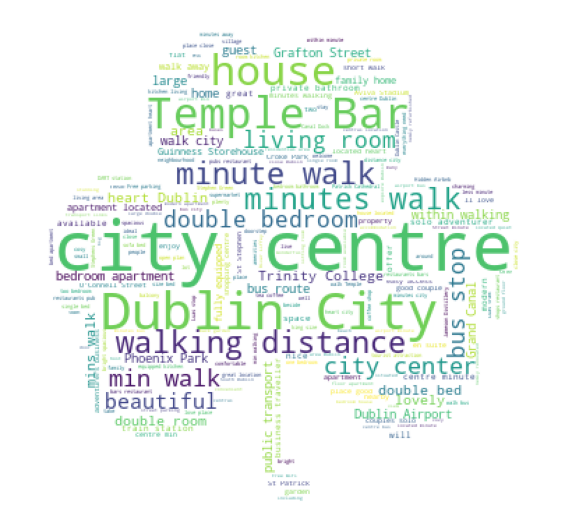

In [24]:
import numpy as np
from PIL import Image
import requests

url = "https://raw.githubusercontent.com/danpanetta/data_science/master/projetos/notebooks/Analyzing_Airbnb_Data/data/shamrock.jpg"

stopwords = set(STOPWORDS)
dublin_mask = np.array(Image.open(requests.get(url, stream=True).raw))

wordcloud = WordCloud(stopwords=stopwords,
                      background_color='white',
                      max_words=200,
                      max_font_size=200,
                      min_font_size=1,
                      mask=dublin_mask,
                      width=1600, height=1600).generate(all_summary)

image_colors = ImageColorGenerator(dublin_mask)

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)
wordcloud.to_file("airbnb_summary_wordcloud.png")

# Conclusion

The objective of this project was to explore the Dublin City Airbnb dataset by obtaining the DataFrame format, the types of each variable, the amount of missing data, the outliers of the 'price' and 'minimum_nights' columns, the distribution and average price per neighborhood and make a word cloud with the ads of each listings.
With that, we can say that you can get a lot of interesting information with the dataset and make an analysis of how they are distributed throughout the city, whether there is a concentration of listings with only high prices or only with low prices, what is the proportion of room_type in the city, among others.

In the case of Dublin, for the date of January 27, 2020, the file `listing.csv` has 9250 entries and 16 columns. Only three columns have missing values, 'neighborhood_group' com. 100% of the values ​​and 'reviews_per_month' and last_review' with 15.8% each. In the dataset there are some outliers that do not interfere with the proposed analysis, but by removing the outliers it was possible to have a better view of the histograms. Dublin City is the place with the largest offer of listings, but it is the place with the highest prices. In the city there are no locations with a concentration of listings with only high or only low prices.

In the word cloud, the set of words that stood out the most was "city center", "Temple Bar", "Dublin City", Walking distance ". This shows that most listings put these words in the ad to get the attention of who is looking for a place to stay.